In [35]:
import pandas as pd

df = pd.read_csv(
    'data/RAW_interactions.csv',
    sep=',',              # délimiteur confirmé
    quotechar='"',        # gère les phrases avec des virgules à l'intérieur
    encoding='utf-8',
    engine='python'       # plus robuste pour les textes longs
)

df.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [37]:
!pip install transformers torch nltk textblob

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [38]:
from transformers import pipeline

# Créer le pipeline de sentiment
sentiment_pipeline = pipeline('sentiment-analysis', 
                             model='distilbert-base-uncased-finetuned-sst-2-english')

# Analyser chaque review
def get_sentiment(review):
    if pd.isna(review):
        return None
    result = sentiment_pipeline(review[:512])  # Max 512 caractères
    return result[0]['label']  # 'POSITIVE' ou 'NEGATIVE'

df['sentiment'] = df['review'].apply(get_sentiment)


Device set to use mps:0


In [46]:
df.head(5)

,user_id,recipe_id,date,rating,review,sentiment
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,POSITIVE
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",POSITIVE
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,POSITIVE
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,POSITIVE
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",POSITIVE


In [48]:
df.to_csv('recipes_with_sentiment.csv', index=False)
from datetime import datetime

# Charger ton précieux fichier
df = pd.read_csv('recipes_with_sentiment.csv')

# BACKUP MULTIPLE (au cas où...)
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Backup 1: CSV avec timestamp
df.to_csv(f'sentiment_backup_{timestamp}.csv', index=False)

# Backup 2: Pickle (plus rapide à recharger)
df.to_pickle(f'sentiment_backup_{timestamp}.pkl')

# Backup 3: Parquet (compressé et rapide)
df.to_parquet(f'sentiment_backup_{timestamp}.parquet')

print(f"✅ 3 backups créés avec timestamp {timestamp}")
print(f"📁 Fichiers sauvegardés:")
print(f"   - sentiment_backup_{timestamp}.csv")
print(f"   - sentiment_backup_{timestamp}.pkl")
print(f"   - sentiment_backup_{timestamp}.parquet")
df.head()
df.head()

✅ 3 backups créés avec timestamp 20251029_175126
📁 Fichiers sauvegardés:
   - sentiment_backup_20251029_175126.csv
   - sentiment_backup_20251029_175126.pkl
   - sentiment_backup_20251029_175126.parquet


,user_id,recipe_id,date,rating,review,sentiment
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,POSITIVE
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",POSITIVE
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,POSITIVE
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,POSITIVE
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",POSITIVE


In [50]:
import pandas as pd
import numpy as np

# Charger (avec backup automatique)
df = pd.read_csv('recipes_with_sentiment.csv')

print("=" * 70)
print("📊 APERÇU DES DONNÉES")
print("=" * 70)

# Infos générales
print(f"\n✅ Nombre total de reviews: {len(df):,}")
print(f"✅ Nombre de recettes uniques: {df['recipe_id'].nunique():,}")
print(f"✅ Période: {df['date'].min()} à {df['date'].max()}")

# Colonnes
print(f"\n📋 Colonnes disponibles:")
for col in df.columns:
    print(f"   - {col}")

# Aperçu
print(f"\n🔍 Aperçu des données:")
df.head(10)

📊 APERÇU DES DONNÉES

✅ Nombre total de reviews: 1,132,367
✅ Nombre de recettes uniques: 231,637
✅ Période: 2000-01-25 à 2018-12-20

📋 Colonnes disponibles:
   - user_id
   - recipe_id
   - date
   - rating
   - review
   - sentiment

🔍 Aperçu des données:


,user_id,recipe_id,date,rating,review,sentiment
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,POSITIVE
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",POSITIVE
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,POSITIVE
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,POSITIVE
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",POSITIVE
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,POSITIVE
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo...",NEGATIVE
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...,NEGATIVE
8,76535,134728,2005-09-02,4,Very good!,POSITIVE
9,273745,134728,2005-12-22,5,Better than the real!!,POSITIVE


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Configuration visuelle
plt.style.use('default')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Charger les données
df = pd.read_csv('recipes_with_sentiment.csv')

print("✅ Données chargées avec succès!")
print(f"📊 {len(df):,} reviews | {df['recipe_id'].nunique():,} recettes")

✅ Données chargées avec succès!
📊 1,132,367 reviews | 231,637 recettes


In [57]:
print("🎭 DISTRIBUTION DES SENTIMENTS")
print("=" * 60)

sentiment_df = pd.DataFrame({
    'Sentiment': df['sentiment'].value_counts().index,
    'Nombre': df['sentiment'].value_counts().values,
    'Pourcentage': (df['sentiment'].value_counts().values / len(df) * 100).round(2)
})

# Styling avec couleurs pertinentes
def color_sentiment(row):
    if row['Sentiment'] == 'POSITIVE':
        return ['background-color: #d4edda; color: #155724; font-weight: bold'] * len(row)
    else:  # NEGATIVE
        return ['background-color: #f8d7da; color: #721c24; font-weight: bold'] * len(row)

sentiment_styled = sentiment_df.style\
    .apply(color_sentiment, axis=1)\
    .format({'Nombre': '{:,.0f}', 'Pourcentage': '{:.2f}%'})\
    .set_properties(**{'text-align': 'center', 'font-size': '14px'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#343a40'), 
                                     ('color', 'white'), 
                                     ('font-weight', 'bold'),
                                     ('text-align', 'center')]}
    ])

display(sentiment_styled)

🎭 DISTRIBUTION DES SENTIMENTS


,Sentiment,Nombre,Pourcentage
0,POSITIVE,"946,920",83.62%
1,NEGATIVE,"185,278",16.36%


In [58]:
print("\n⭐ DISTRIBUTION DES RATINGS")
print("=" * 60)

rating_df = pd.DataFrame({
    'Rating': df['rating'].value_counts().sort_index().index,
    'Nombre': df['rating'].value_counts().sort_index().values,
    'Pourcentage': (df['rating'].value_counts().sort_index().values / len(df) * 100).round(2)
})

# Couleurs par rating
def color_rating(row):
    rating = row['Rating']
    if rating == 0:
        return ['background-color: #ffc107; color: #000'] * len(row)  # Jaune (suspect)
    elif rating in [1, 2]:
        return ['background-color: #ff6b6b; color: white'] * len(row)  # Rouge
    elif rating == 3:
        return ['background-color: #ffd93d; color: #000'] * len(row)  # Jaune orangé
    elif rating == 4:
        return ['background-color: #95e1d3; color: #000'] * len(row)  # Vert clair
    else:  # rating == 5
        return ['background-color: #6bcf7f; color: white; font-weight: bold'] * len(row)  # Vert

rating_styled = rating_df.style\
    .apply(color_rating, axis=1)\
    .format({'Nombre': '{:,.0f}', 'Pourcentage': '{:.2f}%'})\
    .set_properties(**{'text-align': 'center', 'font-size': '14px'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#343a40'), 
                                     ('color', 'white'), 
                                     ('font-weight', 'bold'),
                                     ('text-align', 'center')]}
    ])

display(rating_styled)

# Stats rapides
print(f"\n📊 Rating moyen: {df['rating'].mean():.2f}")
print(f"📊 Rating médian: {df['rating'].median():.0f}")


⭐ DISTRIBUTION DES RATINGS


,Rating,Nombre,Pourcentage
0,0,"60,847",5.37%
1,1,"12,818",1.13%
2,2,"14,123",1.25%
3,3,"40,855",3.61%
4,4,"187,360",16.55%
5,5,"816,364",72.09%



📊 Rating moyen: 4.41
📊 Rating médian: 5


In [59]:
print("\n📊 TABLEAU CROISÉ : Rating x Sentiment (Nombres)")
print("=" * 60)

crosstab = pd.crosstab(df['rating'], df['sentiment'], margins=True)

# Couleurs: plus la cellule est verte, plus c'est cohérent
def color_crosstab(val):
    # Pour les valeurs numériques uniquement
    if isinstance(val, (int, float)) and not pd.isna(val):
        if val > 100000:
            return 'background-color: #2d6a4f; color: white; font-weight: bold'
        elif val > 50000:
            return 'background-color: #52b788; color: white'
        elif val > 20000:
            return 'background-color: #95d5b2; color: black'
        elif val > 5000:
            return 'background-color: #d8f3dc; color: black'
        else:
            return 'background-color: #f7f7f7; color: black'
    return ''

crosstab_styled = crosstab.style\
    .applymap(color_crosstab)\
    .format('{:,.0f}')\
    .set_properties(**{'text-align': 'center', 'font-size': '13px'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#212529'), 
                                     ('color', 'white'), 
                                     ('font-weight', 'bold'),
                                     ('text-align', 'center')]},
        {'selector': '.row_heading', 'props': [('background-color', '#495057'), 
                                                ('color', 'white'),
                                                ('font-weight', 'bold')]}
    ])

display(crosstab_styled)


📊 TABLEAU CROISÉ : Rating x Sentiment (Nombres)


/var/folders/ms/qzgtjj3j3mn0m5lv1hk9kcr40000gn/T/ipykernel_7660/3837198816.py:23: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_crosstab)\


sentiment,NEGATIVE,POSITIVE,All
rating,,,
0,"22,723","38,124","60,847"
1,"11,807","1,008","12,815"
2,"11,817","2,305","14,122"
3,"24,457","16,395","40,852"
4,"40,221","147,112","187,333"
5,"74,253","741,976","816,229"
All,"185,278","946,920","1,132,198"


In [63]:
print("\n📊 POURCENTAGE par Rating (chaque ligne = 100%)")
print("=" * 60)
print("🎯 COHÉRENCE : Rating vs Sentiment\n")

crosstab_pct = pd.crosstab(df['rating'], df['sentiment'], normalize='index') * 100

# Créer un DataFrame de couleurs
def get_color_matrix(crosstab_pct):
    colors = pd.DataFrame('', index=crosstab_pct.index, columns=crosstab_pct.columns)
    
    for rating in crosstab_pct.index:
        for sentiment in crosstab_pct.columns:
            val = crosstab_pct.loc[rating, sentiment]
            
            # Rating 0 : toujours suspect
            if rating == 0:
                colors.loc[rating, sentiment] = 'background-color: #ffc107; color: #000; font-weight: bold'
            
            # Rating 1-2 : devrait être NÉGATIF
            elif rating in [1, 2]:
                if sentiment == 'NEGATIVE':
                    if val > 80:
                        colors.loc[rating, sentiment] = 'background-color: #28a745; color: white; font-weight: bold'
                    elif val > 60:
                        colors.loc[rating, sentiment] = 'background-color: #5cb85c; color: white'
                    else:
                        colors.loc[rating, sentiment] = 'background-color: #ffc107; color: #000'
                else:  # POSITIVE
                    if val > 20:
                        colors.loc[rating, sentiment] = 'background-color: #dc3545; color: white; font-weight: bold'
                    elif val > 10:
                        colors.loc[rating, sentiment] = 'background-color: #fd7e14; color: white'
                    else:
                        colors.loc[rating, sentiment] = 'background-color: #fff3cd; color: #856404'
            
            # Rating 3 : neutre
            elif rating == 3:
                colors.loc[rating, sentiment] = 'background-color: #e2e3e5; color: #383d41'
            
            # Rating 4-5 : devrait être POSITIF
            else:  # rating in [4, 5]
                if sentiment == 'POSITIVE':
                    if val > 80:
                        colors.loc[rating, sentiment] = 'background-color: #28a745; color: white; font-weight: bold'
                    elif val > 60:
                        colors.loc[rating, sentiment] = 'background-color: #5cb85c; color: white'
                    else:
                        colors.loc[rating, sentiment] = 'background-color: #ffc107; color: #000'
                else:  # NEGATIVE
                    if val > 20:
                        colors.loc[rating, sentiment] = 'background-color: #dc3545; color: white; font-weight: bold'
                    elif val > 10:
                        colors.loc[rating, sentiment] = 'background-color: #fd7e14; color: white'
                    else:
                        colors.loc[rating, sentiment] = 'background-color: #fff3cd; color: #856404'
    
    return colors

# Appliquer les couleurs
color_matrix = get_color_matrix(crosstab_pct)

def apply_color_matrix(x, color_matrix=color_matrix):
    return color_matrix

crosstab_pct_styled = crosstab_pct.style\
    .apply(lambda x: color_matrix, axis=None)\
    .format('{:.2f}%')\
    .set_properties(**{'text-align': 'center', 'font-size': '14px'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#212529'), 
                                     ('color', 'white'), 
                                     ('font-weight', 'bold'),
                                     ('text-align', 'center')]},
        {'selector': '.row_heading', 'props': [('background-color', '#495057'), 
                                                ('color', 'white'),
                                                ('font-weight', 'bold')]}
    ])

display(crosstab_pct_styled)

print("\n💡 LÉGENDE:")
print("   🟢 Vert = COHÉRENT")
print("   🟡/🟠 Jaune/Orange = Incohérent")
print("   🔴 Rouge = TRÈS incohérent")
print("   ⚫ Gris = Neutre (rating 3)")


📊 POURCENTAGE par Rating (chaque ligne = 100%)
🎯 COHÉRENCE : Rating vs Sentiment



sentiment,NEGATIVE,POSITIVE
rating,,
0,37.34%,62.66%
1,92.13%,7.87%
2,83.68%,16.32%
3,59.87%,40.13%
4,21.47%,78.53%
5,9.10%,90.90%



💡 LÉGENDE:
   🟢 Vert = COHÉRENT
   🟡/🟠 Jaune/Orange = Incohérent
   🔴 Rouge = TRÈS incohérent
   ⚫ Gris = Neutre (rating 3)


In [69]:
print("=" * 70)
print("🔬 RATING = 0 : Échantillon pour Analyse Manuelle")
print("=" * 70)

rating_0_all = df[df['rating'] == 0]

print(f"\nTotal reviews avec rating = 0 : {len(rating_0_all):,}")
print(f"   • {len(rating_0_all[rating_0_all['sentiment'] == 'POSITIVE']):,} classées POSITIF")
print(f"   • {len(rating_0_all[rating_0_all['sentiment'] == 'NEGATIVE']):,} classées NÉGATIF\n")

# ═══════════════════════════════════════════════════════════════════════════
# 15 REVIEWS POSITIVES - AFFICHAGE DIRECT
# ═══════════════════════════════════════════════════════════════════════════
print("😊 15 REVIEWS : Rating = 0 + Sentiment POSITIF")
print("=" * 70)

r0_positive = rating_0_all[rating_0_all['sentiment'] == 'POSITIVE'].sample(15, random_state=42)

# Afficher comme DataFrame - Jupyter va rendre ça scrollable
display(r0_positive[['rating', 'recipe_id', 'date', 'sentiment', 'review']].reset_index(drop=True))

# ═══════════════════════════════════════════════════════════════════════════
# 15 REVIEWS NÉGATIVES
# ═══════════════════════════════════════════════════════════════════════════
print("\n😡 15 REVIEWS : Rating = 0 + Sentiment NÉGATIF")
print("=" * 70)

r0_negative = rating_0_all[rating_0_all['sentiment'] == 'NEGATIVE'].sample(15, random_state=42)

# Afficher comme DataFrame
display(r0_negative[['rating', 'recipe_id', 'date', 'sentiment', 'review']].reset_index(drop=True))

🔬 RATING = 0 : Échantillon pour Analyse Manuelle

Total reviews avec rating = 0 : 60,847
   • 38,124 classées POSITIF
   • 22,723 classées NÉGATIF

😊 15 REVIEWS : Rating = 0 + Sentiment POSITIF


,rating,recipe_id,date,sentiment,review
0,0,217062,2011-02-13,POSITIVE,"Excellent combo~~we love balsamic! I also sprinkled the yams with some course sea salt & freshly ground pepper before roasting. Make sure to not cut your cubes too small, as they will be done before getting a real chance to caramelize. Thanks!"
1,0,132402,2008-07-14,POSITIVE,"These were delicious, and so beautiful. I used Wilton's Meringue and it went very well with my home grown red currants. Thank you so much!"
2,0,283673,2017-06-27,POSITIVE,"I will try your recipe, but the recipe from the 1946 version of the gentleman's companion vol2 exotic drink book is way different from your recipe. I think you are using a modern adaptation. I wonder where you are getting yours?"
3,0,292876,2008-03-20,POSITIVE,"I have made thuis recipe for years. It was in the paper when we still lived in Milwaukee. However I do not throw out the asparagus bottoms, but simmer them in the chicken broth with a bay leaf while the rest is getting ready. I then use the strained broth to complete the recipe. it does make a difference Koechin"
4,0,299899,2010-11-30,POSITIVE,Just made these this afternoon and they are awesome! Even my picky teenage daughter thought they were great. Finally a light cookie bar recipe that I can keep!
5,0,34338,2012-09-09,POSITIVE,Awesome! I added zuchinni and parmasean cheese
6,0,67256,2010-01-18,POSITIVE,"This IS the BEST banana cake I have ever tasted. It took 70 minutes to bake in my oven. I used frozen ripe banana's and I toasted the walnuts before topping the icing and it even made it better. I baked it in a metal pan and it raised so uniformly, just looked perfect. This truly is a keeper, everyone loved it.\nVeronica"
7,0,128952,2013-07-02,POSITIVE,Wow is this sweet... but it sure is good. Will definitely make again but with less sugar.
8,0,44942,2017-01-28,POSITIVE,Great also made with ham and cheddar cheese.
9,0,337449,2017-01-22,POSITIVE,"I made this, and it was very tasty. I did not have carrots or bell pepper or kale, so I substituted a small tangerine and beet greens. I also used a Thai pepper instead of habanero, and a medium shallot for the sweet onion. The color and taste were not exactly like V8, but it was delicious nonetheless."



😡 15 REVIEWS : Rating = 0 + Sentiment NÉGATIF


,rating,recipe_id,date,sentiment,review
0,0,349488,2011-06-26,NEGATIVE,"made this, used walmart thick cut pork chops (no bone) - made the sauce the night before (I also added a 4-5 second squirt of honey (not sure it matters to do night before) - probably didn't need as much pepper in the sauce itself .... after 5hrs on low, in the 5 qt. crock pot - it was 210 maybe more.. and break apart tender... i also used emeril Essence instead of seasoning salt (as I think seasoning salt is quite 'salty'... browned them for ~5 minutes on each side .... no water needed in the crock, never opened the lid once... after 5 hours exactly - i put on the Broiler of the Oven, 2nd rack and let it warm up for 3-4 minutes, cracked open the door -then put them in there on top of the broiler pan.. and after about 5 minutes the sauce started to get a bit of a crust and turn black in spots... probably could have gone longer if you like a real black crust (and I'm positive it would NOT dry the pork chops out if you tried this.. two picky kids loved it, and gobbled it up like it was the best thing they've ever had... <br/><br/>key was to broil at the end to get the crust and thicken up the sauce (even though it was a lot more thick sauce then a lot of stuff from the crock pot...) - have found a new way to make all sorts of meat in the crock pot... don't skip the broil addition... also think you could use your favority bbq sauce and get similar results.."
1,0,49591,2008-04-27,NEGATIVE,"I followed the recipe perfectly and these cookies definately were not soft and chewey at all, they turned out crisp and hard and not good at all. I wont ever make these again. YUCK!!"
2,0,519587,2014-12-15,NEGATIVE,"I&#039;m going to try this recipe today. However, I&#039;ll be using Splenda as sugar alcohols do not agree with me. I&#039;ll use pumpkin pie spice and some vanilla in the egg white mixture. I&#039;ll let everyone know how they turn out.&lt;br/&gt;&lt;br/&gt;Later.....&lt;br/&gt;&lt;br/&gt;I made these nuts however, I changed the recipe around.&lt;br/&gt;&lt;br/&gt;To the egg white I added 1/2 tsp of vanilla extract. I used Splenda instead of the sugar alcohol. I also used pumpkin pie spice in place of all the spices called for. I used walnuts, almonds and peanuts for the nut mixture. I had company tonight and they all raved about the spiced nuts and asked for the recipe. So, this one is a keeper!"
3,0,14834,2004-01-14,NEGATIVE,"Woohoohoo! Do you know how many years I've been trying to find a recipe for kanelbulle? The first time I went to Sweden, I stayed in a host family & was given some of ""grandma's"" kanelbulle - I've been addicted ever since! :-)\r\n"
4,0,22925,2010-10-04,NEGATIVE,"Umm ... 49 grams of fat and they're calling this ""Healthy"" Sheppard's Pie? Good Lord, I'd hate to see the unhealthy version."
5,0,110936,2012-08-13,NEGATIVE,"I love both livers and garlic, but I thought this recipe was just okay. Nothing special. I won't make again."
6,0,356028,2017-04-06,NEGATIVE,"It would be helpful to know how long it takes for the pressure cooker takes to come down naturally, for those who don't use pressure cookers."
7,0,112001,2010-02-15,NEGATIVE,"Stop! Do not make this cake. It is a waste of time. Either pick a different recipe or go and buy a cake. I elected to make this for my Father's Birthday and lets just say my family voted and light and cake don't mix well - splurge on the real thing for a birthday. This will not be a recipe that I hold on to - the cake turned out very dense and awful tasting - not to mention the error in the step by step insructions of when to add the baking soda and baking powder - knowing how much my father love's German Chocolate Cake, I made this twice after baking the first one and then realizing the error. A complete waste of my evening and later to learn a waste of my time trying it."
8,0,281300,2017-03-12,NEGATIVE,"The picture of the chicken looks like it has a coating, but when I read the directions, it said nothing ab

In [70]:
df.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'sentiment'], dtype='object')

In [ ]:
print("=" * 70)
print("📉 RECETTES QUI VIEILLISSENT MAL")
print("=" * 70)

# Convertir date en datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Filtrer recettes avec au moins 20 reviews sur plusieurs années
recipe_years = df.groupby('recipe_id')['year'].agg(['min', 'max', 'count'])
recipe_years = recipe_years[(recipe_years['count'] >= 20) & (recipe_years['max'] - recipe_years['min'] >= 3)]

print(f"\n📊 Recettes avec assez de données : {len(recipe_years):,}")
print(f"    (min 20 reviews sur au moins 3 ans)\n")

# Pour chaque recette, calculer sentiment par période
aging_analysis = []

for recipe_id in recipe_years.index[:100]:  # Analyser 100 premières
    recipe_reviews = df[df['recipe_id'] == recipe_id].copy()
    
    # Diviser en 2 périodes : début vs fin
    median_year = recipe_reviews['year'].median()
    
    early = recipe_reviews[recipe_reviews['year'] <= median_year]
    late = recipe_reviews[recipe_reviews['year'] > median_year]
    
    if len(early) >= 5 and len(late) >= 5:
        # Calculer % positif pour chaque période
        early_positive = (early['sentiment'] == 'POSITIVE').sum() / len(early) * 100
        late_positive = (late['sentiment'] == 'POSITIVE').sum() / len(late) * 100
        
        # Calculer rating moyen (exclure 0)
        early_rating = early[early['rating'] > 0]['rating'].mean()
        late_rating = late[late['rating'] > 0]['rating'].mean()
        
        # Evolution
        sentiment_change = late_positive - early_positive
        rating_change = late_rating - early_rating
        
        aging_analysis.append({
            'recipe_id': recipe_id,
            'early_years': f"{early['year'].min()}-{early['year'].max()}",
            'late_years': f"{late['year'].min()}-{late['year'].max()}",
            'early_reviews': len(early),
            'late_reviews': len(late),
            'early_positive_pct': early_positive,
            'late_positive_pct': late_positive,
            'sentiment_change': sentiment_change,
            'early_rating': early_rating,
            'late_rating': late_rating,
            'rating_change': rating_change
        })

aging_df = pd.DataFrame(aging_analysis)

# Trier par plus grande détérioration
aging_df = aging_df.sort_values('sentiment_change')

print("🔴 TOP 10 RECETTES QUI VIEILLISSENT MAL (sentiment décline)\n")
print("─" * 70)

worst_aging = aging_df.head(10)
display(worst_aging[['recipe_id', 'early_years', 'late_years', 
                     'early_positive_pct', 'late_positive_pct', 
                     'sentiment_change', 'rating_change']].style
        .background_gradient(subset=['sentiment_change'], cmap='RdYlGn')
        .format({
            'early_positive_pct': '{:.1f}%',
            'late_positive_pct': '{:.1f}%',
            'sentiment_change': '{:+.1f}%',
            'rating_change': '{:+.2f}'
        }))

print("\n🟢 TOP 10 RECETTES QUI S'AMÉLIORENT (sentiment augmente)\n")
print("─" * 70)

best_aging = aging_df.tail(10).sort_values('sentiment_change', ascending=False)
display(best_aging[['recipe_id', 'early_years', 'late_years', 
                    'early_positive_pct', 'late_positive_pct', 
                    'sentiment_change', 'rating_change']].style
        .background_gradient(subset=['sentiment_change'], cmap='RdYlGn')
        .format({
            'early_positive_pct': '{:.1f}%',
            'late_positive_pct': '{:.1f}%',
            'sentiment_change': '{:+.1f}%',
            'rating_change': '{:+.2f}'
        }))



📉 RECETTES QUI VIEILLISSENT MAL

📊 Recettes avec assez de données : 7,914
    (min 20 reviews sur au moins 3 ans)

🔴 TOP 10 RECETTES QUI VIEILLISSENT MAL (sentiment décline)

──────────────────────────────────────────────────────────────────────


,recipe_id,early_years,late_years,early_positive_pct,late_positive_pct,sentiment_change,rating_change
75,3092,2002-2009,2010-2018,82.1%,41.7%,-40.4%,+0.32
42,1600,2000-2009,2010-2017,90.9%,61.1%,-29.8%,-0.15
43,1873,2003-2008,2009-2012,89.5%,60.0%,-29.5%,-0.19
10,376,2001-2008,2009-2014,85.7%,57.1%,-28.6%,+0.00
35,1133,2006-2009,2010-2011,75.0%,50.0%,-25.0%,-1.02
20,601,2001-2005,2006-2009,90.9%,66.7%,-24.2%,+0.20
52,2364,2002-2008,2009-2014,78.6%,55.6%,-23.0%,-0.41
92,3520,2002-2009,2010-2014,92.9%,71.4%,-21.4%,-0.36
11,414,2003-2007,2008-2014,100.0%,80.0%,-20.0%,+0.00
67,2791,2004-2010,2011-2018,87.9%,68.2%,-19.7%,-0.38



🟢 TOP 10 RECETTES QUI S'AMÉLIORENT (sentiment augmente)

──────────────────────────────────────────────────────────────────────


,recipe_id,early_years,late_years,early_positive_pct,late_positive_pct,sentiment_change,rating_change
48,2056,2002-2008,2009-2015,72.7%,100.0%,+27.3%,+0.07
86,3436,2001-2006,2007-2017,64.3%,90.9%,+26.6%,-0.08
2,142,2001-2008,2009-2012,84.6%,100.0%,+15.4%,+0.16
64,2713,2001-2007,2008-2014,85.7%,100.0%,+14.3%,+0.07
19,567,2002-2011,2012-2017,54.5%,66.7%,+12.1%,+0.62
95,3579,2001-2008,2009-2018,90.3%,100.0%,+9.7%,+0.07
82,3294,2001-2008,2009-2015,83.3%,92.3%,+9.0%,-0.14
61,2686,2002-2009,2010-2017,80.0%,88.9%,+8.9%,+0.23
29,834,2001-2003,2004-2010,69.6%,77.3%,+7.7%,-0.02
59,2663,2007-2009,2010-2015,92.3%,100.0%,+7.7%,-0.09



💡 INTERPRÉTATION :
   sentiment_change négatif = Recette aimée avant, moins maintenant
   sentiment_change positif = Recette s'améliore avec le temps
   Causes possibles : changement de goûts, ingrédients moins disponibles, etc.


👥 POWER USERS & COMPORTEMENT

📊 Utilisateurs avec au moins 5 reviews : 23,085

🔥 TOP 20 POWER USERS (le plus de reviews)

──────────────────────────────────────────────────────────────────────


,total_reviews,unique_recipes,avg_rating,positive_pct,active_days,reviews_per_day
user_id,,,,,,
424680,7671,7671,4.97,96.7%,2540,1101.89
37449,5603,5603,4.88,97.7%,4738,431.55
383346,4628,4628,4.78,84.3%,2820,598.80
169430,4076,4076,4.77,89.5%,5119,290.57
128473,3917,3917,4.91,99.5%,5363,266.54
89831,3353,3353,4.95,93.3%,2834,431.69
58104,3288,3288,4.76,79.7%,4100,292.64
133174,3107,3107,4.75,84.8%,5162,219.65
199848,3018,3018,4.84,93.1%,3598,306.08



📊 SEGMENTATION DES UTILISATEURS

──────────────────────────────────────────────────────────────────────
profile
Balanced                              10964
Fan (90%+ positif)                     8362
Balanced - Power User                  1732
Critic (≤50% positif)                  1004
Fan (90%+ positif) - Power User         998
Critic (≤50% positif) - Power User       25
Name: count, dtype: int64


🍳 USERS QUI TESTENT DES RECETTES SIMILAIRES

──────────────────────────────────────────────────────────────────────
(Users avec ratio élevé : peu de recettes uniques mais beaucoup de reviews)



,total_reviews,unique_recipes,recipe_repeat_ratio,positive_pct,profile
user_id,,,,,



💡 INTERPRÉTATION :
   recipe_repeat_ratio > 2 = User teste plusieurs fois les mêmes recettes
   Ou teste des variations de recettes similaires
   Ce sont des 'specialists' plutôt que des 'explorateurs'


📊 DISTRIBUTION DES UTILISATEURS



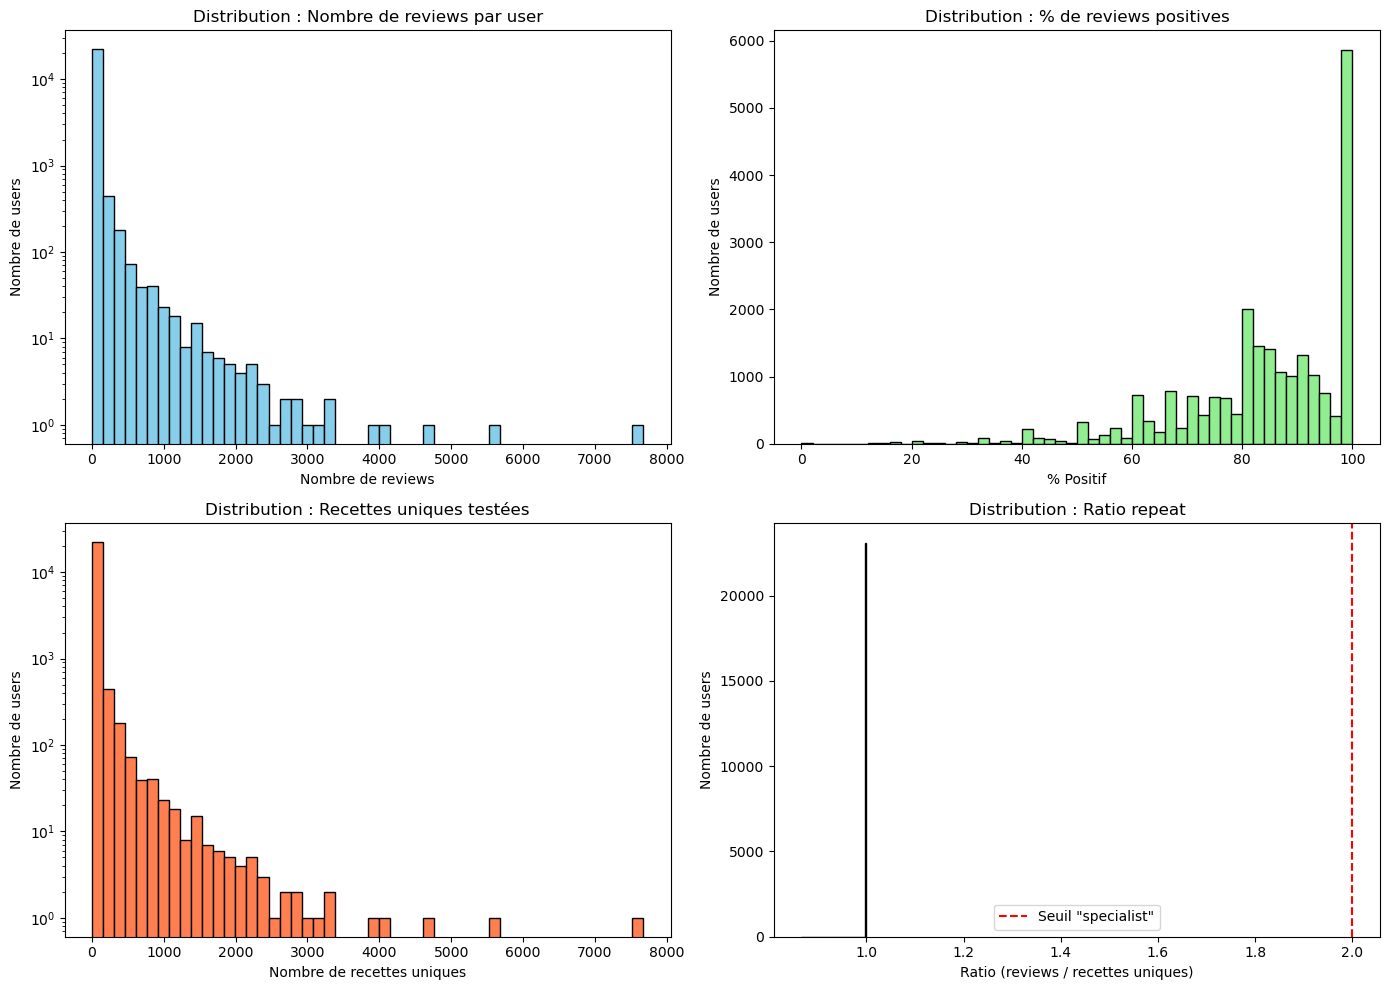

In [72]:
print("=" * 70)
print("👥 POWER USERS & COMPORTEMENT")
print("=" * 70)

# Analyser les utilisateurs
user_stats = df.groupby('user_id').agg({
    'review': 'count',
    'recipe_id': 'nunique',
    'rating': lambda x: x[x > 0].mean(),  # Moyenne sans les 0
    'sentiment': lambda x: (x == 'POSITIVE').sum() / len(x) * 100,
    'date': lambda x: (x.max() - x.min()).days
}).rename(columns={
    'review': 'total_reviews',
    'recipe_id': 'unique_recipes',
    'rating': 'avg_rating',
    'sentiment': 'positive_pct',
    'date': 'active_days'
})

user_stats = user_stats[user_stats['total_reviews'] >= 5]  # Min 5 reviews
user_stats['reviews_per_day'] = user_stats['total_reviews'] / (user_stats['active_days'] + 1) * 365

print(f"\n📊 Utilisateurs avec au moins 5 reviews : {len(user_stats):,}\n")

# TOP POWER USERS
print("🔥 TOP 20 POWER USERS (le plus de reviews)\n")
print("─" * 70)

top_users = user_stats.nlargest(20, 'total_reviews')
display(top_users.style
        .background_gradient(subset=['total_reviews'], cmap='YlOrRd')
        .format({
            'total_reviews': '{:.0f}',
            'unique_recipes': '{:.0f}',
            'avg_rating': '{:.2f}',
            'positive_pct': '{:.1f}%',
            'active_days': '{:.0f}',
            'reviews_per_day': '{:.2f}'
        }))

# PROFILS D'UTILISATEURS
print("\n📊 SEGMENTATION DES UTILISATEURS\n")
print("─" * 70)

user_stats['profile'] = 'Balanced'
user_stats.loc[user_stats['positive_pct'] >= 90, 'profile'] = 'Fan (90%+ positif)'
user_stats.loc[user_stats['positive_pct'] <= 50, 'profile'] = 'Critic (≤50% positif)'
user_stats.loc[user_stats['total_reviews'] >= 50, 'profile'] = user_stats.loc[user_stats['total_reviews'] >= 50, 'profile'] + ' - Power User'

profile_counts = user_stats['profile'].value_counts()
print(profile_counts)

# USERS QUI TESTENT BEAUCOUP DE RECETTES SIMILAIRES
print("\n\n🍳 USERS QUI TESTENT DES RECETTES SIMILAIRES\n")
print("─" * 70)
print("(Users avec ratio élevé : peu de recettes uniques mais beaucoup de reviews)\n")

user_stats['recipe_repeat_ratio'] = user_stats['total_reviews'] / user_stats['unique_recipes']
serial_testers = user_stats[user_stats['recipe_repeat_ratio'] >= 2].nlargest(15, 'recipe_repeat_ratio')

display(serial_testers[['total_reviews', 'unique_recipes', 'recipe_repeat_ratio', 
                        'positive_pct', 'profile']].style
        .background_gradient(subset=['recipe_repeat_ratio'], cmap='Purples')
        .format({
            'total_reviews': '{:.0f}',
            'unique_recipes': '{:.0f}',
            'recipe_repeat_ratio': '{:.2f}x',
            'positive_pct': '{:.1f}%'
        }))

print("\n💡 INTERPRÉTATION :")
print("   recipe_repeat_ratio > 2 = User teste plusieurs fois les mêmes recettes")
print("   Ou teste des variations de recettes similaires")
print("   Ce sont des 'specialists' plutôt que des 'explorateurs'")

# DISTRIBUTION
print("\n\n📊 DISTRIBUTION DES UTILISATEURS\n")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Reviews par user
axes[0, 0].hist(user_stats['total_reviews'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution : Nombre de reviews par user')
axes[0, 0].set_xlabel('Nombre de reviews')
axes[0, 0].set_ylabel('Nombre de users')
axes[0, 0].set_yscale('log')

# % Positif
axes[0, 1].hist(user_stats['positive_pct'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution : % de reviews positives')
axes[0, 1].set_xlabel('% Positif')
axes[0, 1].set_ylabel('Nombre de users')

# Recettes uniques
axes[1, 0].hist(user_stats['unique_recipes'], bins=50, color='coral', edgecolor='black')
axes[1, 0].set_title('Distribution : Recettes uniques testées')
axes[1, 0].set_xlabel('Nombre de recettes uniques')
axes[1, 0].set_ylabel('Nombre de users')
axes[1, 0].set_yscale('log')

# Ratio
axes[1, 1].hist(user_stats['recipe_repeat_ratio'], bins=50, color='plum', edgecolor='black')
axes[1, 1].set_title('Distribution : Ratio repeat')
axes[1, 1].set_xlabel('Ratio (reviews / recettes uniques)')
axes[1, 1].set_ylabel('Nombre de users')
axes[1, 1].axvline(x=2, color='red', linestyle='--', label='Seuil "specialist"')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

📉 RECETTES QUI VIEILLISSENT MAL (Version Corrigée)

📋 CRITÈRES D'ANALYSE :
   • Minimum 30 reviews total
   • Minimum 10 reviews par période (début/fin)
   • Période couvrant au moins 3 années distinctes

✅ Recettes valides pour l'analyse : 4,453

   (sur 231,637 recettes totales)

📊 Recettes analysées : 4,453

🔴 TOP 15 RECETTES QUI VIEILLISSENT LE PLUS MAL
(sentiment décline le plus entre période début et fin)



,recipe_id,total_reviews,early_period,late_period,early_reviews,late_reviews,early_positive_pct,late_positive_pct,sentiment_change,rating_change
1190,37793,33,2004-05 to 2010-04,2010-04 to 2018-02,17,16,76.5%,25.0%,-51.5%,-2.34
3926,204860,32,2007-01 to 2010-03,2011-08 to 2018-06,16,16,87.5%,37.5%,-50.0%,-0.24
394,16216,32,2003-04 to 2008-07,2008-08 to 2011-09,16,16,93.8%,43.8%,-50.0%,-0.64
3830,190639,58,2006-12 to 2009-12,2009-12 to 2018-01,29,29,82.8%,34.5%,-48.3%,-0.32
3023,113015,31,2005-11 to 2008-12,2009-01 to 2017-09,16,15,93.8%,46.7%,-47.1%,-0.67
3934,206581,30,2007-06 to 2009-10,2010-01 to 2017-04,15,15,93.3%,46.7%,-46.7%,-0.23
3619,161680,30,2006-07 to 2009-01,2009-02 to 2015-06,15,15,93.3%,46.7%,-46.7%,-0.35
3591,158372,30,2006-03 to 2011-02,2011-04 to 2018-03,15,15,93.3%,46.7%,-46.7%,-0.58
2402,84828,62,2004-10 to 2010-12,2010-12 to 2017-12,31,31,83.9%,38.7%,-45.2%,-0.40
3186,123602,37,2006-03 to 2011-05,2011-05 to 2018-08,19,18,89.5%,44.4%,-45.0%,-0.31



🟢 TOP 15 RECETTES QUI S'AMÉLIORENT LE PLUS
(sentiment augmente le plus dans le temps)



,recipe_id,total_reviews,early_period,late_period,early_reviews,late_reviews,early_positive_pct,late_positive_pct,sentiment_change,rating_change
1886,62778,34,2004-05 to 2010-01,2010-02 to 2018-05,17,17,64.7%,100.0%,+35.3%,+0.35
28,2056,37,2002-10 to 2008-11,2008-11 to 2015-10,19,18,68.4%,100.0%,+31.6%,+0.15
1709,56117,32,2004-10 to 2008-05,2008-05 to 2016-04,16,16,62.5%,93.8%,+31.2%,+0.16
643,22600,40,2002-07 to 2007-10,2008-03 to 2016-12,20,20,50.0%,80.0%,+30.0%,-0.39
547,19717,41,2002-03 to 2007-07,2007-08 to 2018-08,21,20,57.1%,85.0%,+27.9%,+0.66
3672,168634,41,2006-05 to 2011-07,2012-02 to 2018-03,21,20,57.1%,85.0%,+27.9%,+0.23
3373,137609,43,2005-09 to 2010-03,2010-03 to 2015-12,22,21,72.7%,100.0%,+27.3%,+0.26
486,18110,30,2002-02 to 2007-04,2007-11 to 2017-08,15,15,66.7%,93.3%,+26.7%,+0.43
4341,351655,37,2009-02 to 2014-01,2014-02 to 2018-05,19,18,57.9%,83.3%,+25.4%,-0.44
4186,272233,40,2007-12 to 2009-11,2009-11 to 2017-10,20,20,70.0%,95.0%,+25.0%,+0.00



📊 STATISTIQUES GLOBALES

Changement de sentiment :
   Moyenne : -6.19%
   Médiane : -5.88%
   Écart-type : 10.98%

Récupération rating (avec données valides) :
   Moyenne : -0.11
   Médiane : -0.08
   Recettes avec rating valide : 4,453

💡 INTERPRÉTATION :
   • sentiment_change < 0 : Recette moins appréciée avec le temps
   • sentiment_change > 0 : Recette plus appréciée avec le temps
   • Causes possibles : évolution des goûts, ingrédients disponibilité, tendances


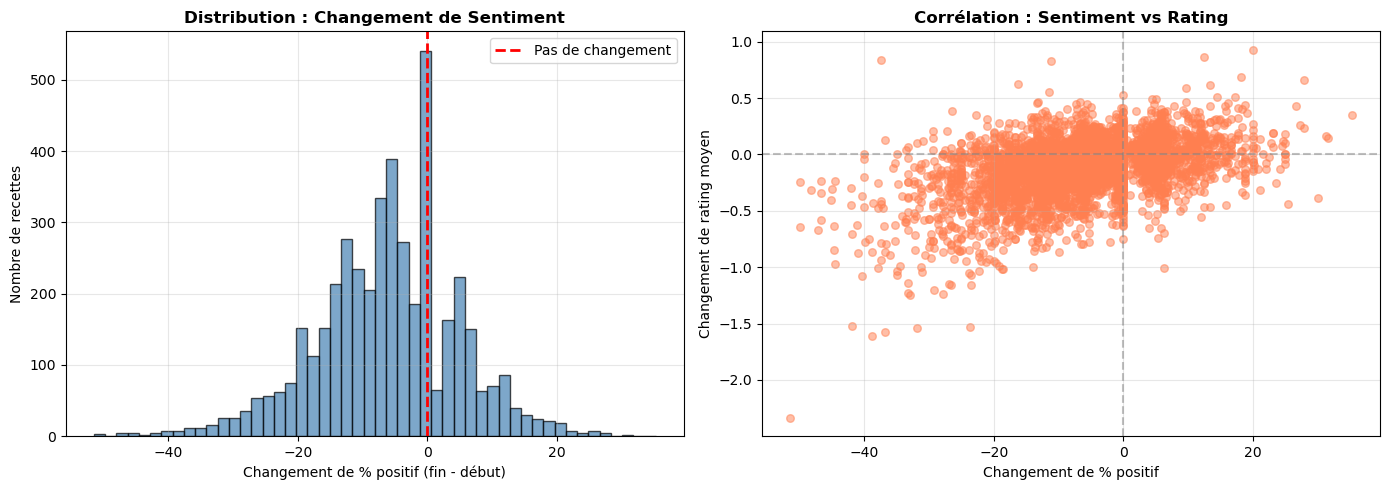


📈 Corrélation sentiment_change ↔ rating_change : 0.458


In [73]:
print("=" * 70)
print("📉 RECETTES QUI VIEILLISSENT MAL (Version Corrigée)")
print("=" * 70)

# Convertir date en datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# CRITÈRES CLAIRS ET EXPLICITES
MIN_TOTAL_REVIEWS = 30  # Minimum de reviews au total
MIN_REVIEWS_PER_PERIOD = 10  # Minimum dans chaque période
MIN_TIME_SPAN_YEARS = 2  # Au moins 3 années distinctes (max - min >= 2)

print(f"\n📋 CRITÈRES D'ANALYSE :")
print(f"   • Minimum {MIN_TOTAL_REVIEWS} reviews total")
print(f"   • Minimum {MIN_REVIEWS_PER_PERIOD} reviews par période (début/fin)")
print(f"   • Période couvrant au moins {MIN_TIME_SPAN_YEARS + 1} années distinctes\n")

# Filtrer recettes avec assez de données
recipe_stats = df.groupby('recipe_id').agg({
    'date': ['min', 'max', 'count'],
    'year': lambda x: x.max() - x.min()
}).reset_index()
recipe_stats.columns = ['recipe_id', 'first_date', 'last_date', 'total_reviews', 'year_span']

# Appliquer les filtres
valid_recipes = recipe_stats[
    (recipe_stats['total_reviews'] >= MIN_TOTAL_REVIEWS) & 
    (recipe_stats['year_span'] >= MIN_TIME_SPAN_YEARS)
]['recipe_id']

print(f"✅ Recettes valides pour l'analyse : {len(valid_recipes):,}\n")
print(f"   (sur {df['recipe_id'].nunique():,} recettes totales)\n")

# Analyser TOUTES les recettes valides (pas juste 100)
aging_analysis = []

for recipe_id in valid_recipes:
    recipe_reviews = df[df['recipe_id'] == recipe_id].copy()
    
    # CORRECTION 1 : Split sur TIMESTAMP médian (pas année médiane)
    median_date = recipe_reviews['date'].median()
    
    early = recipe_reviews[recipe_reviews['date'] <= median_date]
    late = recipe_reviews[recipe_reviews['date'] > median_date]
    
    # Vérifier qu'on a assez de reviews dans chaque période
    if len(early) < MIN_REVIEWS_PER_PERIOD or len(late) < MIN_REVIEWS_PER_PERIOD:
        continue
    
    # Calculer % positif pour chaque période
    early_positive = (early['sentiment'] == 'POSITIVE').sum() / len(early) * 100
    late_positive = (late['sentiment'] == 'POSITIVE').sum() / len(late) * 100
    
    # CORRECTION 2 : Gérer les NaN pour ratings
    early_ratings_valid = early[early['rating'] > 0]['rating']
    late_ratings_valid = late[late['rating'] > 0]['rating']
    
    # Ne calculer que si on a des ratings valides
    if len(early_ratings_valid) >= 5 and len(late_ratings_valid) >= 5:
        early_rating = early_ratings_valid.mean()
        late_rating = late_ratings_valid.mean()
        rating_change = late_rating - early_rating
    else:
        early_rating = None
        late_rating = None
        rating_change = None
    
    # Evolution du sentiment
    sentiment_change = late_positive - early_positive
    
    # Calculer durées des périodes
    early_duration_days = (early['date'].max() - early['date'].min()).days
    late_duration_days = (late['date'].max() - late['date'].min()).days
    
    aging_analysis.append({
        'recipe_id': recipe_id,
        'total_reviews': len(recipe_reviews),
        'early_period': f"{early['date'].min().strftime('%Y-%m')} to {early['date'].max().strftime('%Y-%m')}",
        'late_period': f"{late['date'].min().strftime('%Y-%m')} to {late['date'].max().strftime('%Y-%m')}",
        'early_reviews': len(early),
        'late_reviews': len(late),
        'early_duration_days': early_duration_days,
        'late_duration_days': late_duration_days,
        'early_positive_pct': early_positive,
        'late_positive_pct': late_positive,
        'sentiment_change': sentiment_change,
        'early_rating': early_rating,
        'late_rating': late_rating,
        'rating_change': rating_change
    })

aging_df = pd.DataFrame(aging_analysis)

print(f"📊 Recettes analysées : {len(aging_df):,}\n")

# Trier par plus grande détérioration
aging_df_sorted = aging_df.sort_values('sentiment_change')

print("=" * 70)
print("🔴 TOP 15 RECETTES QUI VIEILLISSENT LE PLUS MAL")
print("=" * 70)
print("(sentiment décline le plus entre période début et fin)\n")

worst_aging = aging_df_sorted.head(15)
display(worst_aging[['recipe_id', 'total_reviews', 'early_period', 'late_period',
                     'early_reviews', 'late_reviews',
                     'early_positive_pct', 'late_positive_pct', 
                     'sentiment_change', 'rating_change']].style
        .background_gradient(subset=['sentiment_change'], cmap='RdYlGn')
        .format({
            'total_reviews': '{:.0f}',
            'early_reviews': '{:.0f}',
            'late_reviews': '{:.0f}',
            'early_positive_pct': '{:.1f}%',
            'late_positive_pct': '{:.1f}%',
            'sentiment_change': '{:+.1f}%',
            'rating_change': lambda x: f'{x:+.2f}' if pd.notna(x) else 'N/A'
        }))

print("\n" + "=" * 70)
print("🟢 TOP 15 RECETTES QUI S'AMÉLIORENT LE PLUS")
print("=" * 70)
print("(sentiment augmente le plus dans le temps)\n")

best_aging = aging_df_sorted.tail(15).sort_values('sentiment_change', ascending=False)
display(best_aging[['recipe_id', 'total_reviews', 'early_period', 'late_period',
                    'early_reviews', 'late_reviews',
                    'early_positive_pct', 'late_positive_pct', 
                    'sentiment_change', 'rating_change']].style
        .background_gradient(subset=['sentiment_change'], cmap='RdYlGn')
        .format({
            'total_reviews': '{:.0f}',
            'early_reviews': '{:.0f}',
            'late_reviews': '{:.0f}',
            'early_positive_pct': '{:.1f}%',
            'late_positive_pct': '{:.1f}%',
            'sentiment_change': '{:+.1f}%',
            'rating_change': lambda x: f'{x:+.2f}' if pd.notna(x) else 'N/A'
        }))

# Statistiques descriptives
print("\n" + "=" * 70)
print("📊 STATISTIQUES GLOBALES")
print("=" * 70)

print(f"\nChangement de sentiment :")
print(f"   Moyenne : {aging_df['sentiment_change'].mean():+.2f}%")
print(f"   Médiane : {aging_df['sentiment_change'].median():+.2f}%")
print(f"   Écart-type : {aging_df['sentiment_change'].std():.2f}%")

print(f"\nRécupération rating (avec données valides) :")
valid_rating_changes = aging_df['rating_change'].dropna()
if len(valid_rating_changes) > 0:
    print(f"   Moyenne : {valid_rating_changes.mean():+.2f}")
    print(f"   Médiane : {valid_rating_changes.median():+.2f}")
    print(f"   Recettes avec rating valide : {len(valid_rating_changes):,}")

print(f"\n💡 INTERPRÉTATION :")
print(f"   • sentiment_change < 0 : Recette moins appréciée avec le temps")
print(f"   • sentiment_change > 0 : Recette plus appréciée avec le temps")
print(f"   • Causes possibles : évolution des goûts, ingrédients disponibilité, tendances")

# Distribution
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution du changement de sentiment
axes[0].hist(aging_df['sentiment_change'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Pas de changement')
axes[0].set_title('Distribution : Changement de Sentiment', fontweight='bold')
axes[0].set_xlabel('Changement de % positif (fin - début)')
axes[0].set_ylabel('Nombre de recettes')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter: changement sentiment vs changement rating
valid_data = aging_df.dropna(subset=['rating_change', 'sentiment_change'])
axes[1].scatter(valid_data['sentiment_change'], valid_data['rating_change'], 
                alpha=0.5, s=30, color='coral')
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[1].set_title('Corrélation : Sentiment vs Rating', fontweight='bold')
axes[1].set_xlabel('Changement de % positif')
axes[1].set_ylabel('Changement de rating moyen')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Corrélation
if len(valid_data) > 0:
    corr = valid_data[['sentiment_change', 'rating_change']].corr().iloc[0, 1]
    print(f"\n📈 Corrélation sentiment_change ↔ rating_change : {corr:.3f}")